### Import Library

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

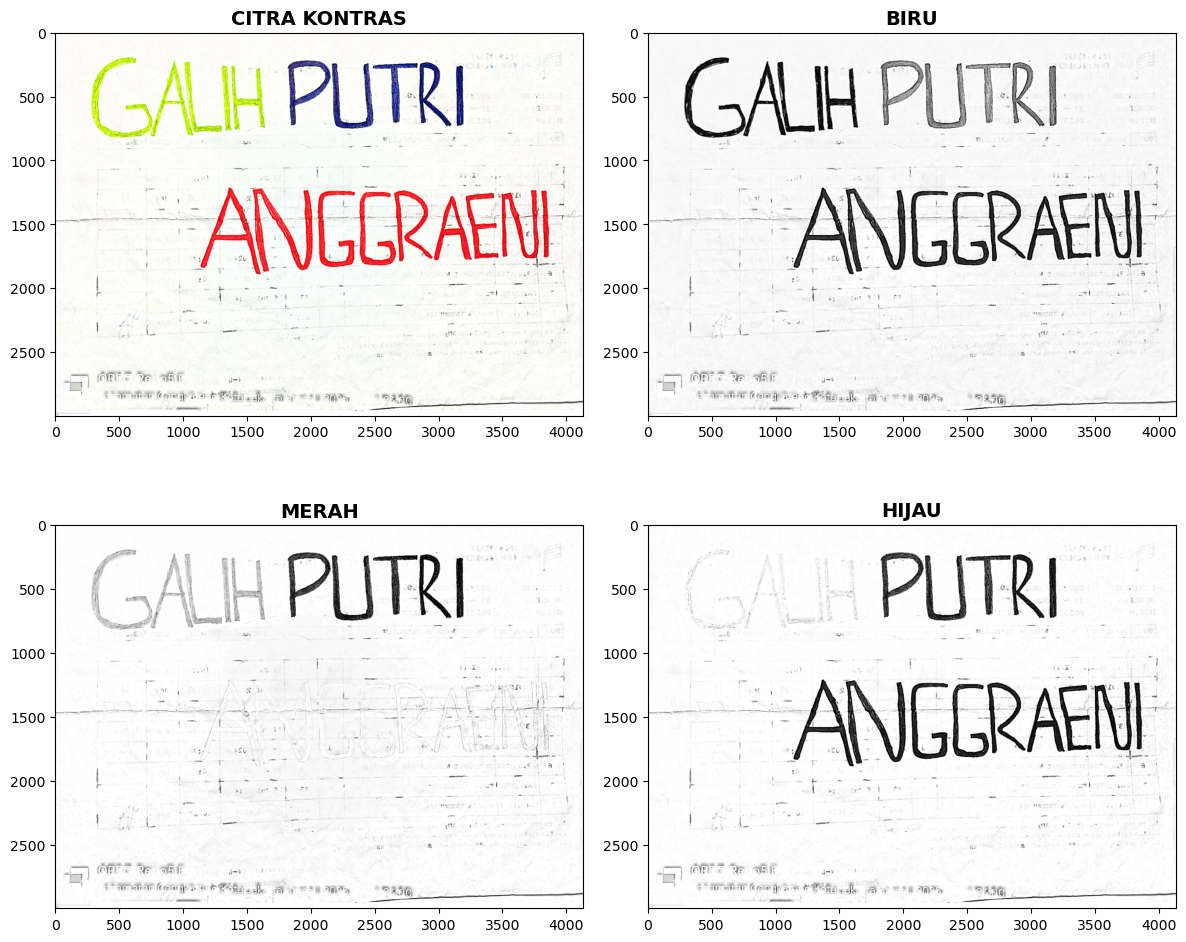

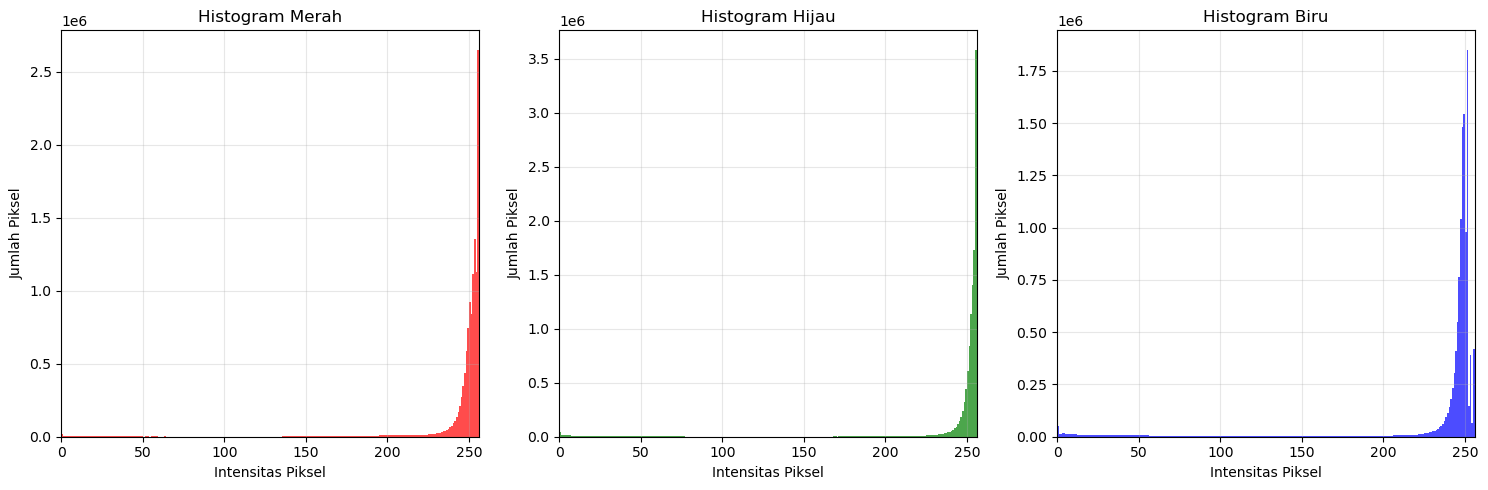

In [3]:
# Baca gambar dari path
lokasi_gambar = "C:/Users/galih putri/Downloads/nama_panjang.jpg"
gambar_asli = cv2.imread(lokasi_gambar)

# Cek apakah gambar berhasil dimuat
if gambar_asli is None:
    print("Gagal memuat gambar. Periksa kembali path yang diberikan.")
else:
    # Pisahkan saluran B, G, R
    kanal_b, kanal_g, kanal_r = cv2.split(gambar_asli)

    # Tampilkan gambar dan masing-masing saluran warna
    plt.figure(figsize=(12, 10))

    plt.subplot(2, 2, 1)
    plt.title('CITRA KONTRAS', fontsize=14, fontweight='bold')
    plt.imshow(cv2.cvtColor(gambar_asli, cv2.COLOR_BGR2RGB))
    plt.axis('on')

    plt.subplot(2, 2, 2)
    plt.title('BIRU', fontsize=14, fontweight='bold')
    plt.imshow(kanal_b, cmap='gray')
    plt.axis('on')

    plt.subplot(2, 2, 3)
    plt.title('MERAH', fontsize=14, fontweight='bold')
    plt.imshow(kanal_r, cmap='gray')
    plt.axis('on')

    plt.subplot(2, 2, 4)
    plt.title('HIJAU', fontsize=14, fontweight='bold')
    plt.imshow(kanal_g, cmap='gray')
    plt.axis('on')

    plt.tight_layout()
    plt.show()

    # Histogram untuk masing-masing saluran
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title('Histogram Merah')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Jumlah Piksel')
    plt.xlim([0, 256])
    plt.grid(alpha=0.3)
    plt.hist(kanal_r.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7)

    plt.subplot(1, 3, 2)
    plt.title('Histogram Hijau')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Jumlah Piksel')
    plt.xlim([0, 256])
    plt.grid(alpha=0.3)
    plt.hist(kanal_g.ravel(), bins=256, range=[0, 256], color='green', alpha=0.7)

    plt.subplot(1, 3, 3)
    plt.title('Histogram Biru')
    plt.xlabel('Intensitas Piksel')
    plt.ylabel('Jumlah Piksel')
    plt.xlim([0, 256])
    plt.grid(alpha=0.3)
    plt.hist(kanal_b.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)

    plt.tight_layout()
    plt.show()

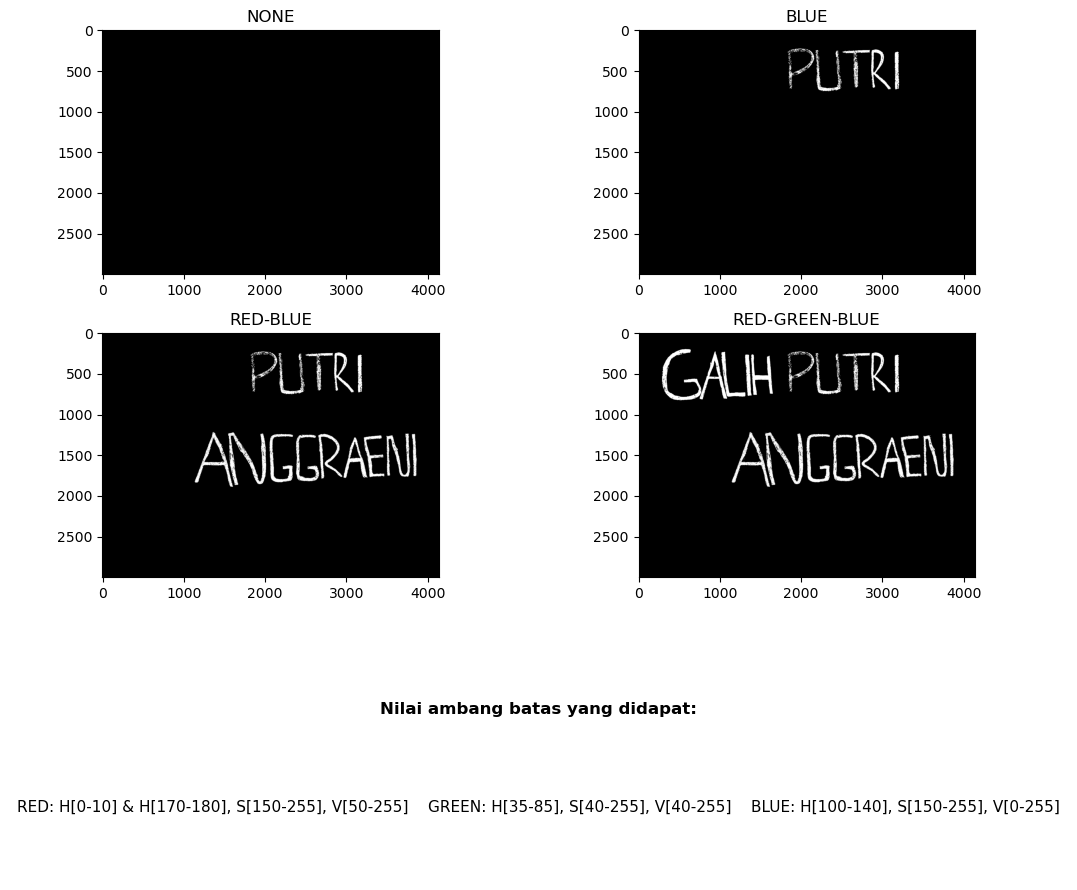

In [4]:
# Baca gambar dan konversi ke HSV
img = cv2.imread("C:/Users/galih putri/Downloads/nama_panjang.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Fungsi buat mask
def get_mask(hsv_img, lower, upper):
    mask = cv2.inRange(hsv_img, lower, upper)
    kernel = np.ones((3, 3), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    return mask

# Threshold warna
blue = get_mask(hsv, np.array([100, 150, 0]), np.array([140, 255, 255]))
red1 = get_mask(hsv, np.array([0, 150, 50]), np.array([10, 255, 255]))
red2 = get_mask(hsv, np.array([170, 150, 50]), np.array([180, 255, 255]))
red = cv2.bitwise_or(red1, red2)
green = get_mask(hsv, np.array([35, 40, 40]), np.array([85, 255, 255]))

# Fungsi terapkan mask
def apply_mask(mask):
    result = np.zeros_like(img)
    result[mask > 0] = [255, 255, 255]
    return result

# Gambar hasil
none_img = np.zeros_like(img)
blue_img = apply_mask(blue)
red_blue_img = apply_mask(cv2.bitwise_or(red, blue))
all_colors_img = apply_mask(cv2.bitwise_or(cv2.bitwise_or(red, green), blue))

# Plot: 2 baris, 2 kolom + baris ke-3 untuk teks
fig = plt.figure(figsize=(12, 9))

# Subplot 4 gambar
ax1 = fig.add_subplot(3, 2, 1)
ax1.imshow(cv2.cvtColor(none_img, cv2.COLOR_BGR2RGB))
ax1.set_title("NONE")

ax2 = fig.add_subplot(3, 2, 2)
ax2.imshow(cv2.cvtColor(blue_img, cv2.COLOR_BGR2RGB))
ax2.set_title("BLUE")

ax3 = fig.add_subplot(3, 2, 3)
ax3.imshow(cv2.cvtColor(red_blue_img, cv2.COLOR_BGR2RGB))
ax3.set_title("RED-BLUE")

ax4 = fig.add_subplot(3, 2, 4)
ax4.imshow(cv2.cvtColor(all_colors_img, cv2.COLOR_BGR2RGB))
ax4.set_title("RED-GREEN-BLUE")

# Subplot teks ambang batas (posisi bawah)
ax5 = fig.add_subplot(3, 1, 3)
ax5.axis("off")

# Teks ambang batas + judul
info_title = "Nilai ambang batas yang didapat:"
threshold_info = "RED: H[0-10] & H[170-180], S[150-255], V[50-255]    " \
                 "GREEN: H[35-85], S[40-255], V[40-255]    " \
                 "BLUE: H[100-140], S[150-255], V[0-255]"

# Tampilkan teks ke subplot bawah
ax5.text(0.5, 0.7, info_title, ha='center', va='center', fontsize=12, fontweight='bold')
ax5.text(0.5, 0.3, threshold_info, ha='center', va='center', fontsize=11)

plt.tight_layout()
plt.show()

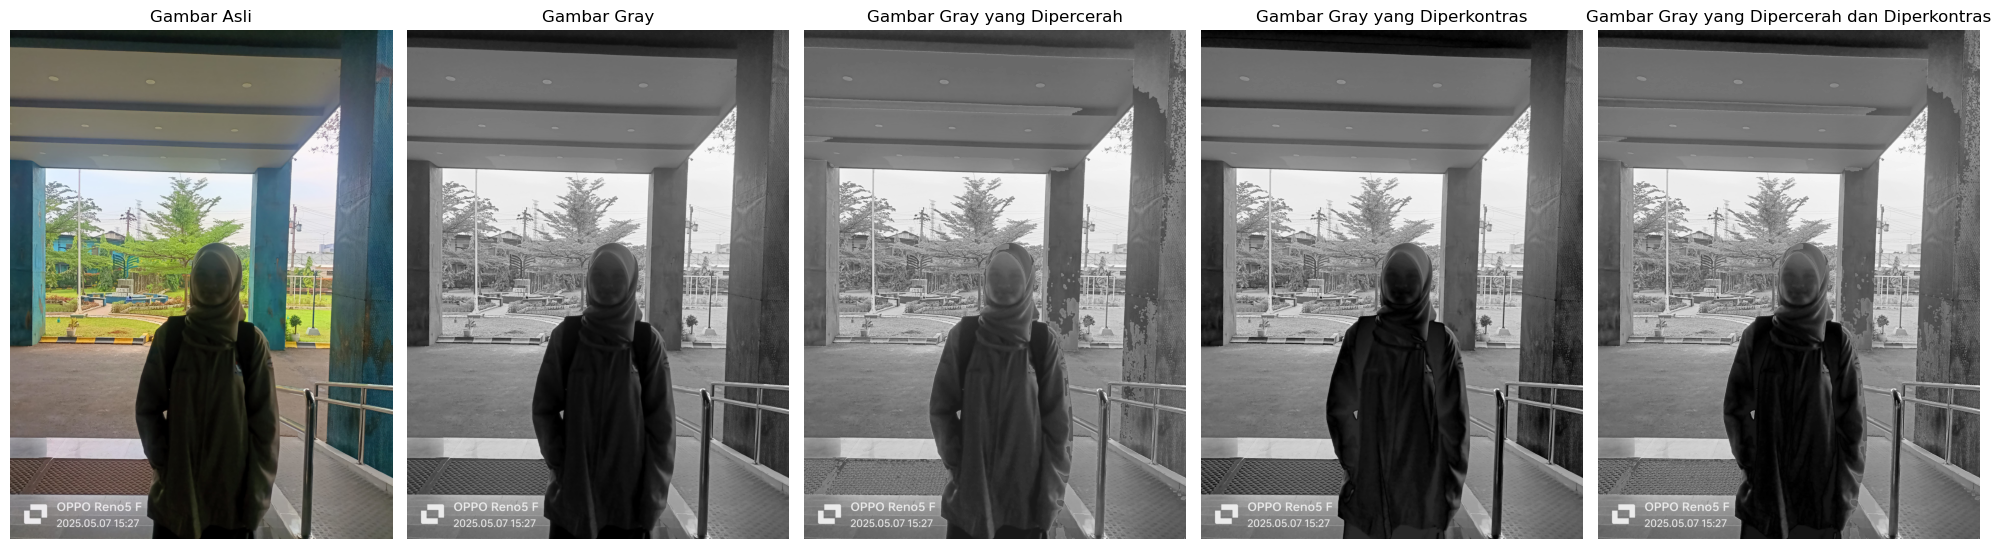

In [16]:
# Load the image
image_path = 'C:/Users/galih putri/Downloads/gambar_backlight.jpg'
image = cv2.imread(image_path)

# Check if image is loaded
if image is None:
    print(f'Gambar tidak ditemukan di path: {image_path}')
else:
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive threshold to create a mask for the human subject
    _, mask = cv2.threshold(gray_image, 80, 255, cv2.THRESH_BINARY_INV)
    mask = cv2.erode(mask, np.ones((5, 5), np.uint8), iterations=1)
    mask = cv2.dilate(mask, np.ones((5, 5), np.uint8), iterations=2)

    # Brighten only the masked area
    bright_image = gray_image.copy()
    temp_bright = cv2.convertScaleAbs(bright_image, alpha=1.3, beta=30)
    bright_image[mask == 255] = temp_bright[mask == 255]

    # Modify the contrast adjustment to match the desired output
    contrast_image = gray_image.copy()
    temp_contrast = cv2.convertScaleAbs(contrast_image, alpha=1.5, beta=-40)
    contrast_image[mask == 255] = temp_contrast[mask == 255]
    
    # Brighten and enhance contrast further
    subject = cv2.convertScaleAbs(gray_image, alpha=1.8, beta=-20)
    bright_contrast_image = gray_image.copy()
    bright_contrast_image[mask == 255] = subject[mask == 255]


    # Display the images
    fig, axes = plt.subplots(1, 5, figsize=(20, 6))
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Gambar Asli')
    axes[0].axis('off')

    axes[1].imshow(gray_image, cmap='gray')
    axes[1].set_title('Gambar Gray')
    axes[1].axis('off')

    axes[2].imshow(bright_image, cmap='gray')
    axes[2].set_title('Gambar Gray yang Dipercerah')
    axes[2].axis('off')

    axes[3].imshow(contrast_image, cmap='gray')
    axes[3].set_title('Gambar Gray yang Diperkontras')
    axes[3].axis('off')

    axes[4].imshow(bright_contrast_image, cmap='gray')
    axes[4].set_title('Gambar Gray yang Dipercerah dan Diperkontras')
    axes[4].axis('off')

    plt.tight_layout()
    plt.show()